In [217]:
import sys
import numpy as np
import cv2
import cv2.ml
from time import sleep
from datetime import datetime
import os
import numpy as np
from random import shuffle
from matplotlib import pyplot as plt
from pandas import read_csv, read_excel, DataFrame
from skimage.feature import hessian_matrix_det as Hessian
from skimage.feature import local_binary_pattern as LBP
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

p = os.path.join('../../','raw','CookIRCamET','Images','CookTests','MedRes')
p2 = os.path.join('../../','work','CookIRCamET','Images','CookTests','MedRes')
n_components1 = 2
n_components2 = 3
n_components3 = 6

In [218]:
def localSD(mat, n):    
    mat=np.float32(mat)
    mu = cv2.blur(mat,(n,n))
    mdiff=mu-mat
    mat2=cv2.blur(np.float64(mdiff*mdiff),(n,n))
    sd = np.float32(cv2.sqrt(mat2))
    
    return sd

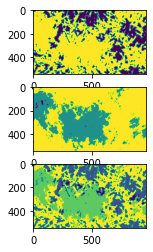

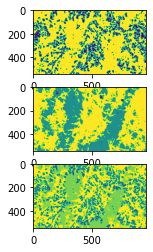

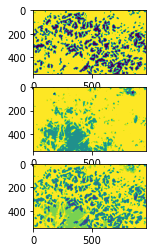

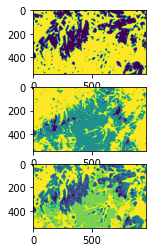

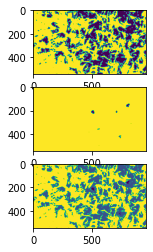

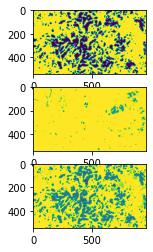

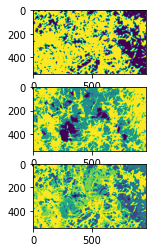

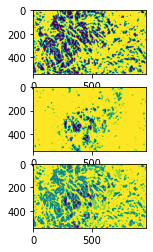

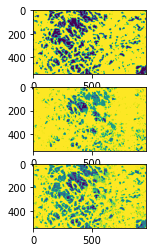

In [284]:
f_imgs=[]
imgs=[]
n_img=0
fs=os.listdir(p)
shuffle(fs)
for f in fs:
    if 'bgr' in f:
        f_imgs = np.append(f_imgs,f)
        bgr = cv2.imread(os.path.join(p,f),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_nofix_bgr')[0]+'_sun.tif'
        labels1 = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_nofix_bgr')[0]+'_src.tif'
        labels2 = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
        l,a,bb = cv2.split(lab)
        h,s,v = cv2.split(hsv)
        
        sd_l1 = localSD(l, 127)
        sd_l2 = localSD(l, 63)
        sd_l3 = localSD(l, 31)
        
        lbp_l1 = LBP(l, 32, 4, method='ror')
        lbp_l2 = LBP(l, 24, 3, method='ror')
        lbp_l3 = LBP(l, 16, 2, method='ror')
        
        sd_a1 = localSD(a, 127)
        sd_a2 = localSD(a, 63)
        sd_a3 = localSD(a, 31)
        
        lbp_a1 = LBP(a, 32, 4, method='ror')
        lbp_a2 = LBP(a, 24, 3, method='ror')
        lbp_a3 = LBP(a, 16, 2, method='ror')
        
        sd_b1 = localSD(bb, 127)
        sd_b2 = localSD(bb, 63)
        sd_b3 = localSD(bb, 31)
        
        lbp_b1 = LBP(bb, 32, 4, method='ror')
        lbp_b2 = LBP(bb, 24, 3, method='ror')
        lbp_b3 = LBP(bb, 16, 2, method='ror')
        
        sd_h1 = localSD(h, 127)
        sd_h2 = localSD(h, 63)
        sd_h3 = localSD(h, 31)
        
        lbp_h1 = LBP(h, 32, 4, method='ror')
        lbp_h2 = LBP(h, 24, 3, method='ror')
        lbp_h3 = LBP(h, 16, 2, method='ror')
        
        sd_s1 = localSD(s, 127)
        sd_s2 = localSD(s, 63)
        sd_s3 = localSD(s, 31)
        
        lbp_s1 = LBP(s, 32, 4, method='ror')
        lbp_s2 = LBP(s, 24, 3, method='ror')
        lbp_s3 = LBP(s, 16, 2, method='ror')
        
        sd_v1 = localSD(v, 127)
        sd_v2 = localSD(v, 63)
        sd_v3 = localSD(v, 31)
        
        lbp_v1 = LBP(v, 32, 4, method='ror')
        lbp_v2 = LBP(v, 24, 3, method='ror')
        lbp_v3 = LBP(v, 16, 2, method='ror')
        
        ddepth = cv2.CV_16S
        
        lap_l1 = cv2.Laplacian(l,ddepth,ksize=3)
        lap_l2 = cv2.Laplacian(l,ddepth,ksize=7)
        lap_l3 = cv2.Laplacian(l,ddepth,ksize=15)
        
        lap_a1 = cv2.Laplacian(a,ddepth,ksize=3)
        lap_a2 = cv2.Laplacian(a,ddepth,ksize=7)
        lap_a3 = cv2.Laplacian(a,ddepth,ksize=15)
        
        lap_b1 = cv2.Laplacian(bb,ddepth,ksize=3)
        lap_b2 = cv2.Laplacian(bb,ddepth,ksize=7)
        lap_b3 = cv2.Laplacian(bb,ddepth,ksize=15)
        
        lap_h1 = cv2.Laplacian(h,ddepth,ksize=3)
        lap_h2 = cv2.Laplacian(h,ddepth,ksize=7)
        lap_h3 = cv2.Laplacian(h,ddepth,ksize=15)
        
        lap_s1 = cv2.Laplacian(s,ddepth,ksize=3)
        lap_s2 = cv2.Laplacian(s,ddepth,ksize=7)
        lap_s3 = cv2.Laplacian(s,ddepth,ksize=15)
        
        lap_v1 = cv2.Laplacian(v,ddepth,ksize=3)
        lap_v2 = cv2.Laplacian(v,ddepth,ksize=7)
        lap_v3 = cv2.Laplacian(v,ddepth,ksize=15)
        
        if True:
            plt.subplot(311)
            plt.imshow(labels1)
            plt.subplot(312)
            plt.imshow(labels2)
            plt.subplot(313)
            plt.imshow(3*labels1+labels2)
            plt.show()
        img_size = l.shape
        bb = bb.ravel()
        a = a.ravel()
        l = l.ravel()
        h = h.ravel()
        s = s.ravel()
        v = v.ravel()
        sd_l1 = sd_l1.ravel()
        sd_l2 = sd_l2.ravel()
        sd_l3 = sd_l3.ravel()
        lbp_l1 = lbp_l1.ravel()
        lbp_l2 = lbp_l2.ravel()
        lbp_l3 = lbp_l3.ravel()
        lap_l1 = lap_l1.ravel()
        lap_l2 = lap_l2.ravel()
        lap_l3 = lap_l3.ravel()
        sd_a1 = sd_a1.ravel()
        sd_a2 = sd_a2.ravel()
        sd_a3 = sd_a3.ravel()
        lbp_a1 = lbp_a1.ravel()
        lbp_a2 = lbp_a2.ravel()
        lbp_a3 = lbp_a3.ravel()
        lap_a1 = lap_a1.ravel()
        lap_a2 = lap_a2.ravel()
        lap_a3 = lap_a3.ravel()
        sd_b1 = sd_b1.ravel()
        sd_b2 = sd_b2.ravel()
        sd_b3 = sd_b3.ravel()
        lbp_b1 = lbp_b1.ravel()
        lbp_b2 = lbp_b2.ravel()
        lbp_b3 = lbp_b3.ravel()
        lap_b1 = lap_b1.ravel()
        lap_b2 = lap_b2.ravel()
        lap_b3 = lap_b3.ravel()
        sd_h1 = sd_h1.ravel()
        sd_h2 = sd_h2.ravel()
        sd_h3 = sd_h3.ravel()
        lbp_h1 = lbp_h1.ravel()
        lbp_h2 = lbp_h2.ravel()
        lbp_h3 = lbp_h3.ravel()
        lap_h1 = lap_h1.ravel()
        lap_h2 = lap_h2.ravel()
        lap_h3 = lap_h3.ravel()
        sd_s1 = sd_s1.ravel()
        sd_s2 = sd_s2.ravel()
        sd_s3 = sd_s3.ravel()
        lbp_s1 = lbp_s1.ravel()
        lbp_s2 = lbp_s2.ravel()
        lbp_s3 = lbp_s3.ravel()
        lap_s1 = lap_s1.ravel()
        lap_s2 = lap_s2.ravel()
        lap_s3 = lap_s3.ravel()
        sd_v1 = sd_v1.ravel()
        sd_v2 = sd_v2.ravel()
        sd_v3 = sd_v3.ravel()
        lbp_v1 = lbp_v1.ravel()
        lbp_v2 = lbp_v2.ravel()
        lbp_v3 = lbp_v3.ravel()
        lap_v1 = lap_v1.ravel()
        lap_v2 = lap_v2.ravel()
        lap_v3 = lap_v3.ravel()
        feat = np.vstack((l.T,a.T,bb.T,h.T,s.T,v.T,
                          sd_l1.T,sd_l2.T,sd_l3.T,
                          lbp_l1.T,lbp_l2.T,lbp_l3.T,
                          lap_l1.T,lap_l2.T,lap_l3.T,
                          sd_a1.T,sd_a2.T,sd_a3.T,
                          lbp_a1.T,lbp_a2.T,lbp_a3.T,
                          lap_a1.T,lap_a2.T,lap_a3.T,
                          sd_b1.T,sd_b2.T,sd_b3.T,
                          lbp_b1.T,lbp_b2.T,lbp_b3.T,
                          lap_b1.T,lap_b2.T,lap_b3.T,
                          sd_h1.T,sd_h2.T,sd_h3.T,
                          lbp_h1.T,lbp_h2.T,lbp_h3.T,
                          lap_h1.T,lap_h2.T,lap_h3.T,
                          sd_s1.T,sd_s2.T,sd_s3.T,
                          lbp_s1.T,lbp_s2.T,lbp_s3.T,
                          lap_s1.T,lap_s2.T,lap_s3.T,
                          sd_v1.T,sd_v2.T,sd_v3.T,
                          lbp_v1.T,lbp_v2.T,lbp_v3.T,
                          lap_v1.T,lap_v2.T,lap_v3.T)).T
        #labels = np.sum(np.vstack((soil.ravel().T, residue.ravel().T*2, shadow.ravel().T*3, vegetation.ravel().T*4)).T,axis=1)
        labels1 = labels1.ravel()        
        labels2 = labels2.ravel() 
        #6-class
        labels3 = 3*labels1+labels2   
        
        imgs.append({'bgr':bgr,'feats':feat,'labels1':labels1,'labels2':labels2,'labels3':labels3})
        n_img=n_img+1
n_feat = feat.shape[1]

In [285]:
n_feat

60

In [286]:
feats = []
labels1 = []
labels2 = []
labels3 = []
for sample in imgs:
    feats.append(sample['feats'])
    labels1.append(sample['labels1'])
    labels2.append(sample['labels2'])
    labels3.append(sample['labels3'])

In [287]:
feats = np.array(feats).reshape((-1,n_feat)).astype(np.float32)
labels1 = np.array(labels1).reshape((-1,1)).astype(np.int32).ravel()
labels2 = np.array(labels2).reshape((-1,1)).astype(np.int32).ravel()
labels3 = np.array(labels3).reshape((-1,1)).astype(np.int32).ravel()
scaler = StandardScaler()
feats = scaler.fit_transform(feats)

In [288]:
train_feats1, test_feats1, train_labels1, test_labels1 = train_test_split(feats, labels1, test_size=0.5, random_state=42)
train_feats2, test_feats2, train_labels2, test_labels2 = train_test_split(feats, labels2, test_size=0.5, random_state=42)
train_feats3, test_feats3, train_labels3, test_labels3 = train_test_split(feats, labels3, test_size=0.5, random_state=42)

In [289]:
def cornfusion(obs,pred,nclass):
    M = np.zeros((nclass,nclass))
    for i in range(obs.shape[0]):
        o = obs[i]
        p = pred[i]
        M[o,p] = M[o,p]+1
    return M

In [290]:
train_feats = train_feats1#[:,mask1]
test_feats = test_feats1#[:,mask1]

In [291]:
#parameters = {'loss':('hinge', 'log_loss', 'perceptron'),'alpha':np.logspace(-6,0,7)}
parameters = {'activation':('relu','logistic'),'hidden_layer_sizes':((int(n_feat/4), n_components1*2),
                                                                     (int(n_feat/2), n_components1*2),
                                                                     (n_feat, n_components1*2),
                                                                     (n_feat*2, n_components1*2),
                                                                     (n_feat*4, n_components1*2),
                                                                     (int(n_feat/4), n_components1),
                                                                     (int(n_feat/2), n_components1),
                                                                     (n_feat, n_components1),
                                                                     (n_feat*2, n_components1),
                                                                     (n_feat*4, n_components1))}
#svc = SGDClassifier(max_iter=100000)
mlp = MLPClassifier(max_iter=100000,random_state=42)

#clf_svc1 = GridSearchCV(svc, parameters,n_jobs=-1,cv=5,verbose=3)
#clf_svc1.fit(train_feats, train_labels1)
#clf_svc1.best_params_
#model_svc1 = clf_svc1.best_estimator_

clf_mlp1 = GridSearchCV(mlp, parameters,n_jobs=-1,cv=5,verbose=3)
clf_mlp1.fit(train_feats, train_labels1)

clf_mlp1.best_params_

model_mlp1 = clf_mlp1.best_estimator_
#model_svc1 = svc.fit(train_feats,train_labels1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 5/5] END activation=relu, hidden_layer_sizes=(240, 4);, score=0.942 total time=50.2min
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 4);, score=0.930 total time=10.6min
[CV 4/5] END activation=relu, hidden_layer_sizes=(120, 2);, score=0.938 total time=23.4min
[CV 2/5] END activation=logistic, hidden_layer_sizes=(15, 2);, score=0.926 total time= 5.3min
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30, 2);, score=0.929 total time=11.2min
[CV 1/5] END activation=relu, hidden_layer_sizes=(60, 4);, score=0.934 total time=14.8min
[CV 5/5] END activation=relu, hidden_layer_sizes=(240, 2);, score=0.938 total time=37.0min
[CV 3/5] END activation=relu, hidden_layer_sizes=(15, 4);, score=0.928 total time=12.5min
[CV 3/5] END activation=relu, hidden_layer_sizes=(240, 2);, score=0.938 total time=39.6min
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 2);, score=0.930 total time= 8.5min
[CV 4/5] END activation=re

In [292]:
#pred_svc1 = model_svc1.predict(test_feats)
pred_mlp1 = clf_mlp1.predict(test_feats)

In [293]:
import pickle
filename = 'finalized_model1.pk.sav'
pickle.dump(model_mlp1, open(filename, 'wb'))

In [294]:
M_mlp1 = cornfusion(test_labels1,pred_mlp1,n_components1)
M_mlp1 = M_mlp1/np.sum(np.sum(M_mlp1))
recall1 = np.diag(M_mlp1)/np.sum(M_mlp1,axis=1)
precis1 = np.diag(M_mlp1)/np.sum(M_mlp1,axis=0)
M_mlp1

array([[0.23989609, 0.0335512 ],
       [0.02319623, 0.70335648]])

In [295]:
train_feats = train_feats2#[:,mask2]
test_feats = test_feats2#[:,mask2]

In [297]:
#parameters = {'loss':('hinge', 'log_loss', 'perceptron'),'alpha':np.logspace(-6,0,7)}
parameters = {'activation':('relu','logistic'),'hidden_layer_sizes':((int(n_feat/4), n_components2*2),
                                                                     (int(n_feat/2), n_components2*2),
                                                                     (n_feat, n_components2*2),
                                                                     (n_feat*2, n_components2*2),
                                                                     (n_feat*4, n_components2*2),
                                                                     (int(n_feat/4), n_components2),
                                                                     (int(n_feat/2), n_components2),
                                                                     (n_feat, n_components2),
                                                                     (n_feat*2, n_components2),
                                                                     (n_feat*4, n_components2))}
#svc = SGDClassifier(max_iter=100000)
mlp = MLPClassifier(max_iter=100000,random_state=42)

#clf_svc1 = GridSearchCV(svc, parameters,n_jobs=-1,cv=5,verbose=3)
#clf_svc1.fit(train_feats, train_labels1)
#clf_svc1.best_params_
#model_svc1 = clf_svc1.best_estimator_

clf_mlp2 = GridSearchCV(mlp, parameters,n_jobs=-1,cv=5,verbose=3)
clf_mlp2.fit(train_feats, train_labels2)

model_mlp2 = clf_mlp2.best_estimator_
#model_svc1 = svc.fit(train_feats,train_labels1)
pred_mlp2 = clf_mlp2.predict(test_feats)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END activation=relu, hidden_layer_sizes=(60, 4);, score=0.932 total time=21.6min
[CV 3/5] END activation=logistic, hidden_layer_sizes=(15, 6);, score=0.920 total time=11.2min
[CV 5/5] END activation=logistic, hidden_layer_sizes=(60, 4);, score=0.933 total time=30.6min
[CV 2/5] END activation=relu, hidden_layer_sizes=(15, 6);, score=0.918 total time=15.2min
[CV 5/5] END activation=relu, hidden_layer_sizes=(120, 3);, score=0.936 total time=32.2min
[CV 3/5] END activation=logistic, hidden_layer_sizes=(30, 3);, score=0.926 total time=17.7min
[CV 5/5] END activation=relu, hidden_layer_sizes=(240, 4);, score=0.940 total time=47.8min
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30, 3);, score=0.926 total time=17.5min
[CV 5/5] END activation=relu, hidden_layer_sizes=(15, 6);, score=0.919 total time=12.2min
[CV 5/5] END activation=relu, hidden_layer_sizes=(60, 3);, score=0.930 total time=14.7min
[CV 2/5] END activat

In [298]:
M_mlp2 = cornfusion(test_labels2,pred_mlp2,n_components2)
M_mlp2 = M_mlp2/np.sum(np.sum(M_mlp2))
recall2 = np.diag(M_mlp2)/np.sum(M_mlp2,axis=1)
precis2 = np.diag(M_mlp2)/np.sum(M_mlp2,axis=0)
M_mlp2

In [300]:
precis2

array([0.77894654, 0.88137587, 0.96760805])

In [301]:
filename = 'finalized_model2.pk.sav'
pickle.dump(model_mlp2, open(filename, 'wb'))

In [302]:
train_feats = train_feats3#[:,mask3]
test_feats = test_feats3#[:,mask3]

In [ ]:
#parameters = {'loss':('hinge', 'log_loss', 'perceptron'),'alpha':np.logspace(-6,0,7)}
parameters = {'activation':('relu','logistic'),'hidden_layer_sizes':((int(n_feat/4), n_components3*2),
                                                                     (int(n_feat/2), n_components3*2),
                                                                     (n_feat, n_components3*2),
                                                                     (n_feat*2, n_components3*2),
                                                                     (n_feat*4, n_components3*2),
                                                                     (int(n_feat/4), n_components3),
                                                                     (int(n_feat/2), n_components3),
                                                                     (n_feat, n_components3),
                                                                     (n_feat*2, n_components3),
                                                                     (n_feat*4, n_components3))}#svc = SGDClassifier(max_iter=100000)
mlp = MLPClassifier(max_iter=100000,random_state=42)

#clf_svc1 = GridSearchCV(svc, parameters,n_jobs=-1,cv=5,verbose=3)
#clf_svc1.fit(train_feats, train_labels1)
#clf_svc1.best_params_
#model_svc1 = clf_svc1.best_estimator_

clf_mlp3 = GridSearchCV(mlp, parameters,n_jobs=-1,cv=5,verbose=3)
clf_mlp3.fit(train_feats, train_labels3)

model_mlp3 = clf_mlp3.best_estimator_
#model_svc1 = svc.fit(train_feats,train_labels1)
pred_mlp3 = clf_mlp3.predict(test_feats)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
M_mlp3 = cornfusion(test_labels3,pred_mlp3,n_components3)
M_mlp3 = M_mlp3/np.sum(np.sum(M_mlp3))
recall3 = np.diag(M_mlp3)/np.sum(M_mlp3,axis=1)
precis3 = np.diag(M_mlp3)/np.sum(M_mlp3,axis=0)
M_mlp3

In [ ]:
recall3

In [ ]:
filename = 'finalized_model3.pk.sav'
pickle.dump(model_mlp3, open(filename, 'wb'))

In [ ]:
M_mlp1_df = {}
M_mlp1_df['shade'] = M_mlp1[:,0]
M_mlp1_df['sun'] = M_mlp1[:,1]
M_mlp1_df = DataFrame(M_mlp1_df)
M_mlp1_df.to_csv(os.path.join(p2,'M1.csv'))

M_mlp2_df = {}
M_mlp2_df['soil'] = M_mlp2[:,0]
M_mlp2_df['res'] = M_mlp2[:,1]
M_mlp2_df['can'] = M_mlp2[:,2]
M_mlp2_df = DataFrame(M_mlp2_df)
M_mlp2_df.to_csv(os.path.join(p2,'M2.csv'))

M_mlp3_df = {}
M_mlp3_df['shade_soil'] = M_mlp3[:,0]
M_mlp3_df['shade_res'] = M_mlp3[:,1]
M_mlp3_df['shade_can'] = M_mlp3[:,2]
M_mlp3_df['sun_soil'] = M_mlp3[:,3]
M_mlp3_df['sun_res'] = M_mlp3[:,4]
M_mlp3_df['sun_can'] = M_mlp3[:,5]
M_mlp3_df = DataFrame(M_mlp2_df)
M_mlp3_df.to_csv(os.path.join(p2,'M3.csv'))

p1_df = DataFrame(clf_mlp1.best_params_)
p1_df.to_csv(os.path.join(p2,'params1.csv'))

p2_df = DataFrame(clf_mlp2.best_params_)
p2_df.to_csv(os.path.join(p2,'params2.csv'))

p3_df = DataFrame(clf_mlp3.best_params_)
p3_df.to_csv(os.path.join(p2,'params3.csv'))